# Kleiner Feldberg (Taunus, Germany) in a changing climate

[Kleiner Feldberg Taunus Observatory](https://www.uni-frankfurt.de/176187470.png?)
(source: https://www.goethe-university-frankfurt.de/176185298/Taunus_Observatory)

In [68]:
# import packages
import pandas as pd 
import numpy as np 
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Download Climate Data

In [69]:
kl_feldberg_ncei_url = ('https://www.ncei.noaa.gov/access/services/data/v1'
                    '?dataset=daily-summaries&dataTypes=TMAX,TMIN&'
                    'stations=GME00124546&startDate=1936-01-01&'
                    'endDate=2024-12-31&units=standard')
kl_feldberg_ncei_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMAX,TMIN&stations=GME00124546&startDate=1936-01-01&endDate=2024-12-31&units=standard'

<Axes: xlabel='DATE'>

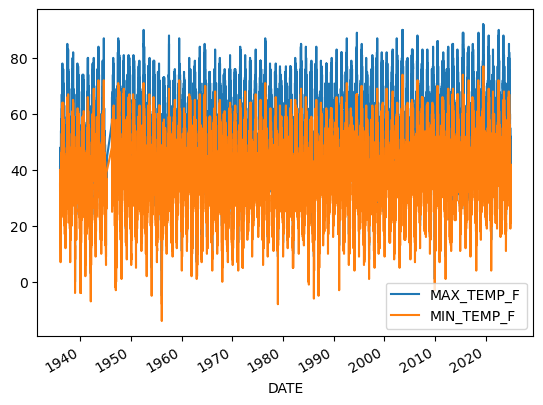

In [70]:
# Download the climate data
kl_feldberg_climate_df = pd.read_csv(
    kl_feldberg_ncei_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
)

# Check that the download worked
kl_feldberg_climate_df.head()

# rename temperature column from TANG (average temperature) 
# to TEMP_F (temperature in Fahrenheit)
kl_feldberg_climate_units_df = kl_feldberg_climate_df.rename(columns={
    'TMAX': 'MAX_TEMP_F',  
    'TMIN': 'MIN_TEMP_F',                                                     
})
kl_feldberg_climate_units_df.plot()

### Conversion Fahrenheit to Celcius 

<Axes: xlabel='DATE'>

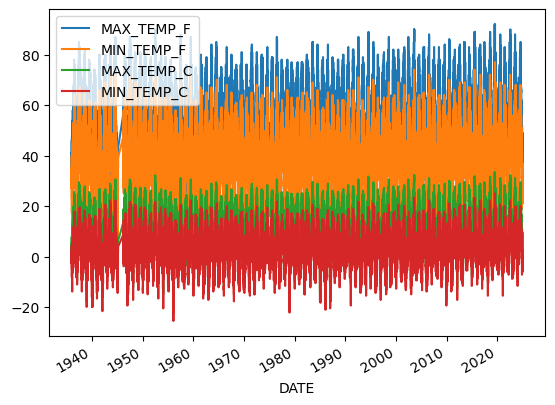

In [71]:
# Convert units with a function
def Fahrenheit_to_Celcius(temperature_F: float):
    """Convert Fahrenheit temperature to Celcius

    :param temperature_F (float): Temperature in Fahrenheit
    """
    return (temperature_F-32) * 5/9 

# execute function
kl_feldberg_climate_units_df['MAX_TEMP_C'] = (
    kl_feldberg_climate_units_df['MAX_TEMP_F'].apply(Fahrenheit_to_Celcius))
kl_feldberg_climate_units_df['MIN_TEMP_C'] = (
    kl_feldberg_climate_units_df['MIN_TEMP_F'].apply(Fahrenheit_to_Celcius))

kl_feldberg_climate_units_df.plot()

In [ ]:
kl_feldberg_climate_units_df = kl_feldberg_climate_units_df[["MAX_TEMP_F", "MIN_TEMP_F", "MAX_TEMP_C", "MIN_TEMP_C"]]
kl_feldberg_climate_units_df

In [74]:
# Resample data to obtain the mean annual temperature.
ann_kl_feldberg_climate_units_df = kl_feldberg_climate_units_df.resample('YS').mean()
ann_kl_feldberg_climate_units_df.head()

,MAX_TEMP_F,MIN_TEMP_F,MAX_TEMP_C,MIN_TEMP_C
DATE,,,,
1936-01-01,47.950820,37.691257,8.861566,3.161809
1937-01-01,48.602740,38.161644,9.223744,3.423135
1938-01-01,48.613699,37.827397,9.229833,3.237443
1939-01-01,47.161644,37.380822,8.423135,2.989346
1940-01-01,45.759563,35.112022,7.644202,1.728901


In [78]:
# Plot the annual data interactively
ann_kl_feldberg_plt = ann_kl_feldberg_climate_units_df.hvplot(y=['MAX_TEMP_C','MIN_TEMP_C'],
    title='Observed Mean Annual Temperature of Kleiner Feldberg [°C]',
    xlabel='Year',
    ylabel='Mean Annual Temperature [°C]'
    )

ann_kl_feldberg_plt

:NdOverlay   [Variable]
   :Curve   [DATE]   (value)